--- Initializing VP-SDE ---
Running demonstration for VP-SDE...


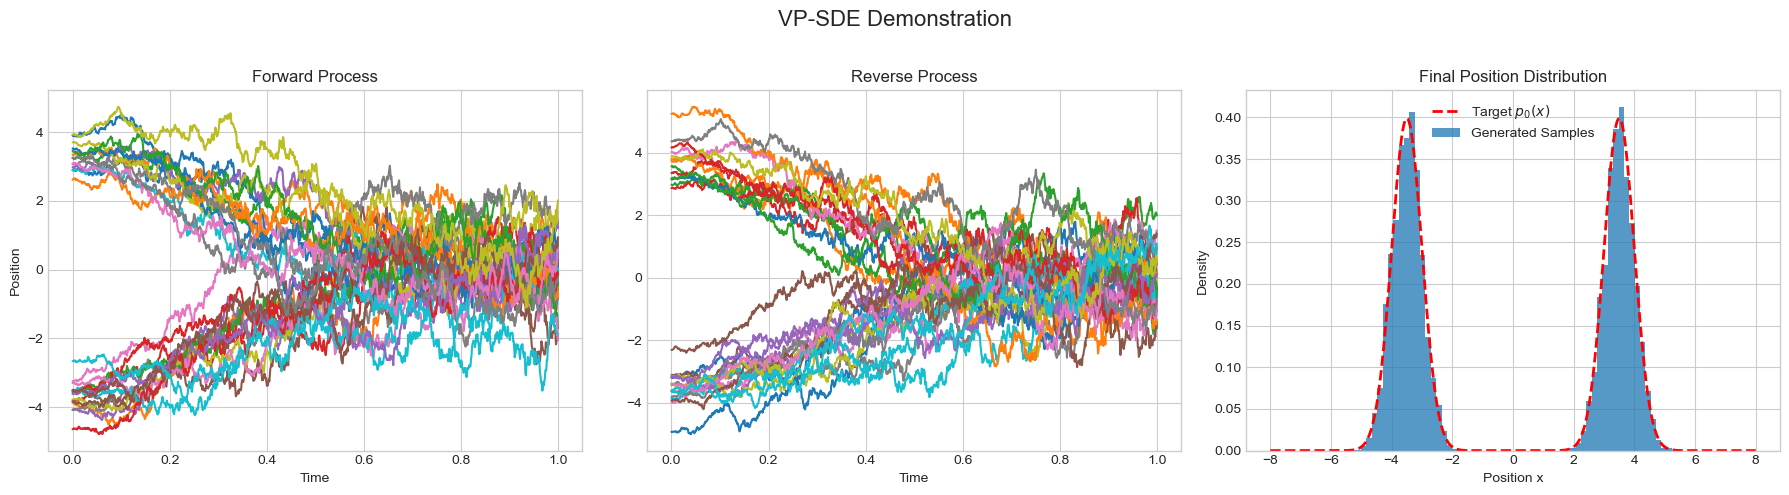



--- Initializing Critically Damped Langevin ---
Pre-computing Critically Damped Langevin moments...
Running demonstration for Critically Damped Langevin...


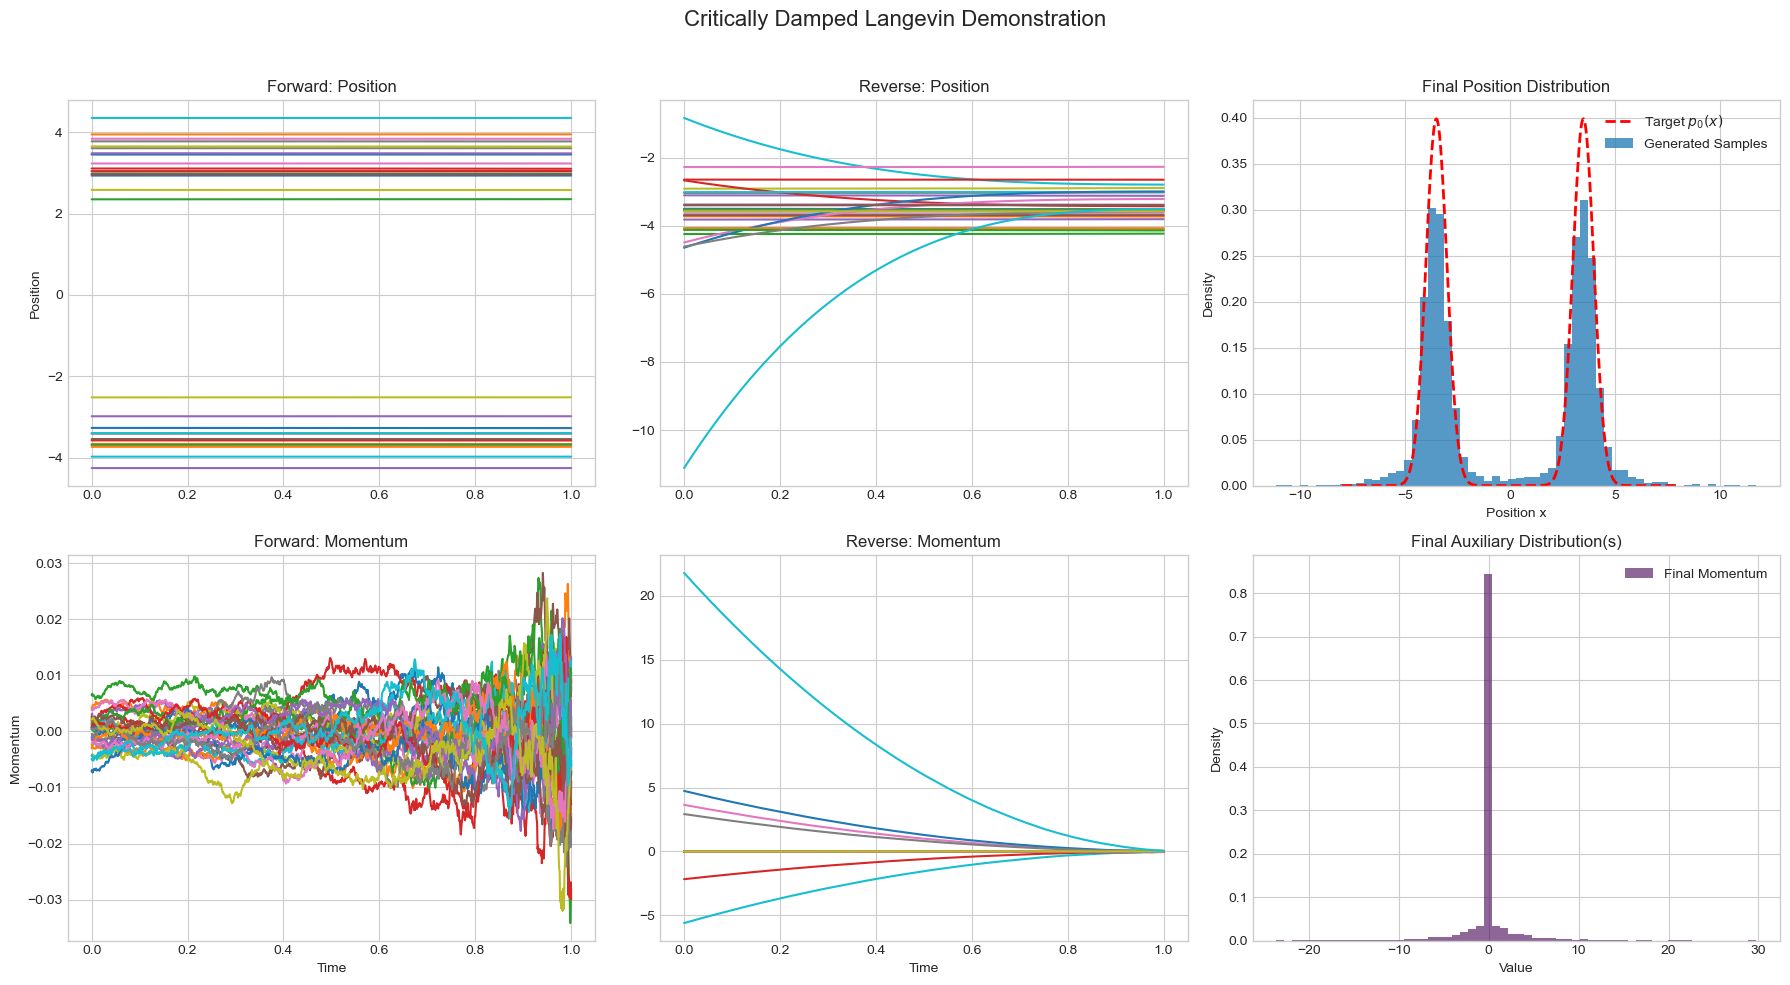



--- Initializing Third-Order Langevin ---
Running placeholder demonstration for Third-Order Langevin...


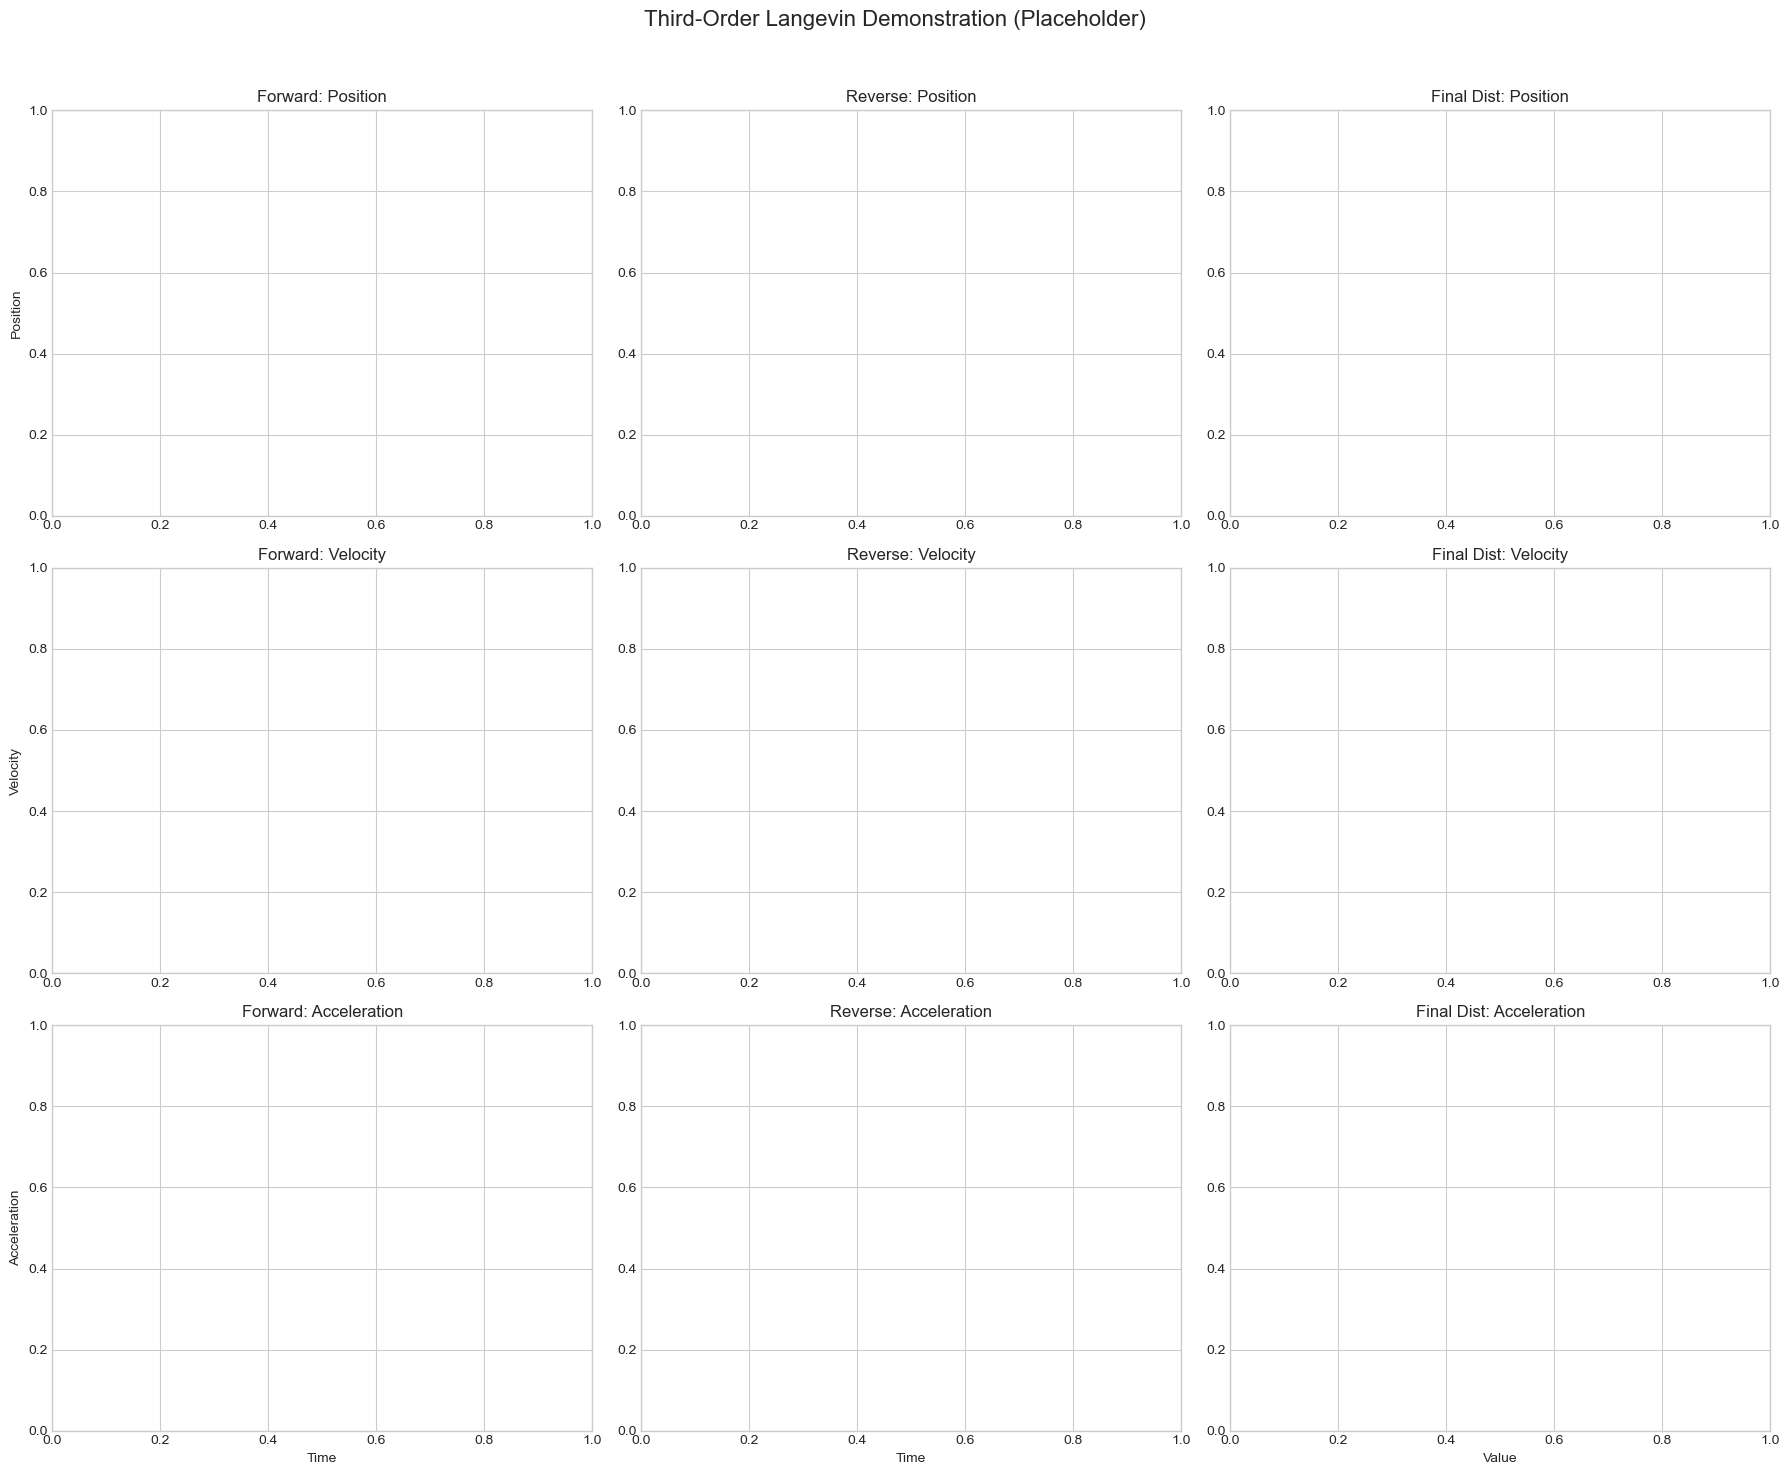

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from diffusion import DiffusionModel
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Arbitrarily specified 1D GMM
GMM_PARAMS = {
    'weights': [0.5, 0.5],
    'means': [-3.5, 3.5],
    'stds': [0.5, 0.5]
}


# --- 3. Second-Order Model Implementations ---


# --- 4. Third-Order Model Placeholders ---
class ThirdOrderModel(DiffusionModel):
    """Abstract base class for third-order models."""
    def __init__(self, name, gmm_params, **kwargs):
        super().__init__(name, gmm_params, **kwargs)
        self.var_names = ['Position', 'Velocity', 'Acceleration']

    def run_demonstration(self, n_plot, n_hist):
        print(f"Running placeholder demonstration for {self.name}...")
        fig, axes = plt.subplots(3, 3, figsize=(18, 15)); fig.suptitle(f'{self.name} Demonstration (Placeholder)', fontsize=16)
        for i in range(3):
            axes[i, 0].set_title(f'Forward: {self.var_names[i]}'); axes[i, 0].set_ylabel(self.var_names[i])
            axes[i, 1].set_title(f'Reverse: {self.var_names[i]}')
            axes[i, 2].set_title(f'Final Dist: {self.var_names[i]}')
            if i == 2:
                axes[i, 0].set_xlabel('Time'); axes[i, 1].set_xlabel('Time'); axes[i, 2].set_xlabel('Value')
        plt.tight_layout(rect=[0, 0, 1, 0.96]); plt.show()
        
class ThirdOrderLangevin(ThirdOrderModel):
    """Placeholder for a Third-Order Langevin model."""
    def __init__(self, gmm_params, **kwargs):
        super().__init__('Third-Order Langevin', gmm_params, **kwargs)

    def precompute(self):
        print(f"Skipping pre-computation for {self.name} (not implemented)."); pass
    def solve_forward_sde(self, x0):
        print(f"Forward SDE not implemented for {self.name}."); return None
    def solve_reverse_sde(self, xT):
        print(f"Reverse SDE not implemented for {self.name}."); return None

# --- 5. Main Execution ---
if __name__ == '__main__':
    n_plot, n_hist = 30, 5000

    vpsde_model = VPSDE(GMM_PARAMS)
    vpsde_model.run_demonstration(n_plot, n_hist)
    
    print("\n" + "="*80 + "\n")
    
    cld_model = CriticallyDampedLangevin(GMM_PARAMS)
    cld_model.run_demonstration(n_plot, n_hist)
    
    print("\n" + "="*80 + "\n")
    
    l3_model = ThirdOrderLangevin(GMM_PARAMS)
    l3_model.run_demonstration(n_plot, n_hist)